<a href="https://colab.research.google.com/github/brunops1/Desafio-Neurotech/blob/main/Desafio_Neurotech_Bruno_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalações e Importações

In [ ]:
# instalar as dependências
!apt-get update -qq
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("desafio neurotech park") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
get_ipython().system_raw('./ngrok http 4050 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
import pyspark
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import Row
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
import atexit
from numpy import array
import numpy as np
import datetime
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install sklearn # Instalação da biblioteca SKLearn (Modelos de Aprendizado de Maquinas)

In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 75 not upgraded.


# Carregamento dos dados


In [ ]:
#import zipfile

In [ ]:

# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AC.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AL.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AM.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/AP.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/BA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/CE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/DF.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/ES.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/GO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MG.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MS.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/MT.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PA.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PB.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PI.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/PR.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RJ.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RN.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RR.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/RS.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SC.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SE.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/SP.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')
# zipfile.ZipFile('/content/drive/MyDrive/Desafio_Neurotech/TO.zip', 'r').extractall('/content/drive/MyDrive/Arquivos_Neurotech')

BR_CONS

In [ ]:
path = '/content/drive/MyDrive/Arquivos_Neurotech/AC/AC_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AL/AL_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AM/AM_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AP/AP_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/BA/BA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/CE/CE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/DF/DF_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/ES/ES_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/GO/GO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MA/MA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MG/MG_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MS/MS_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MT/MT_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PA/PA_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PB/PB_CONS'
BR = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PE/PE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PI/PI_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PR/PR_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RJ/RJ_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RN/RN_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RO/RO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RR/RR_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RS/RS_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SC/SC_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SE/SE_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SP/SP_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/TO/TO_CONS'
BR_CONS = spark.read.csv(path, sep=';', header =True)

In [ ]:
BR_CONS.count()

15859

BR_DET

In [ ]:
path = '/content/drive/MyDrive/Arquivos_Neurotech/AC/AC_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AL/AL_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AM/AM_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/AP/AP_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/BA/BA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/CE/CE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/DF/DF_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/ES/ES_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/GO/GO_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MA/MA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MG/MG_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MS/MS_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/MT/MT_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PA/PA_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PB/PB_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PE/PE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PI/PI_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/PR/PR_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RJ/RJ_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RN/RN_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RO/RO_DET'
BR = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RR/RR_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/RS/RS_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SC/SC_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SE/SE_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/SP/SP_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)
path = '/content/drive/MyDrive/Arquivos_Neurotech/TO/TO_DET'
BR_DET = spark.read.csv(path, sep=';', header =True)

In [ ]:
BR_DET.count()

82625

# Análise Exploratória

In [ ]:
BR_CONS.limit(5).toPandas()


,ID_EVENTO_ATENCAO_SAUDE,ID_PLANO,FAIXA_ETARIA,SEXO,CD_MUNICIPIO_BENEFICIARIO,PORTE,CD_MODALIDADE,NM_MODALIDADE,CD_MUNICIPIO_PRESTADOR,UF_PRESTADOR,TEMPO_DE_PERMANENCIA,ANO_MES_EVENTO,CD_CARATER_ATENDIMENTO,CD_TIPO_INTERNACAO,CD_REGIME_INTERNACAO,CD_MOTIVO_SAIDA,CID_1,CID_2,CID_3,CID_4,QT_DIARIA_ACOMPANHANTE,QT_DIARIA_UTI,IND_ACIDENTE_DOENCA,LG_VALOR_PREESTABELECIDO
0,2930664821,225240,30 a 39,Masculino,170210,PEQUENO,22,Cooperativa Médica,170210,TO,2,2019-10,2,1,1,12,S610,None,None,None,0,0,9,0
1,2920667396,215334,60 a 69,Feminino,172120,MÉDIO,24,Autogestão,170210,TO,8,2019-10,1,1,1,21,None,None,None,None,0,0,9,0
2,2987645747,215334,60 a 69,Masculino,172120,MÉDIO,24,Autogestão,170210,TO,3,2019-10,1,1,1,18,None,None,None,None,0,0,9,0
3,2920667393,215334,60 a 69,Feminino,172120,MÉDIO,24,Autogestão,170210,TO,8,2019-10,1,1,1,21,None,None,None,None,0,0,9,0
4,2854193497,238364,60 a 69,Feminino,170210,GRANDE,22,Cooperativa Médica,170210,TO,1,2019-10,1,1,1,12,Z853,None,None,None,0,0,9,0


In [ ]:
BR_DET.limit(5).toPandas()

,ID_EVENTO_ATENCAO_SAUDE,UF_PRESTADOR,TEMPO_DE_PERMANENCIA,ANO_MES_EVENTO,CD_PROCEDIMENTO,CD_TABELA_REFERENCIA,QT_ITEM_EVENTO_INFORMADO,VL_ITEM_EVENTO_INFORMADO,VL_ITEM_PAGO_FORNECEDOR,IND_PACOTE,IND_TABELA_PROPRIA
0,2805733384,TO,2.0,2019-10,31309054,22,1,"2389,28",0,0,0
1,2805733384,TO,2.0,2019-10,40304108,22,1,"4,8",0,0,0
2,2805733384,TO,2.0,2019-10,031,63,17,"3375,53",0,0,0
3,2805733384,TO,2.0,2019-10,40307760,22,1,"4,8",0,0,0
4,2805733384,TO,2.0,2019-10,029,63,158,"1010,31",0,0,0


In [ ]:
BR_DET.describe (). show () 

+-------+-----------------------+------------+--------------------+--------------+--------------------+--------------------+------------------------+------------------------+-----------------------+--------------------+-------------------+
|summary|ID_EVENTO_ATENCAO_SAUDE|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|     CD_PROCEDIMENTO|CD_TABELA_REFERENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|          IND_PACOTE| IND_TABELA_PROPRIA|
+-------+-----------------------+------------+--------------------+--------------+--------------------+--------------------+------------------------+------------------------+-----------------------+--------------------+-------------------+
|  count|                  82625|       82625|               82598|         82625|               82625|               82625|                   82598|                   82598|                  82598|               82625|              82625|
|   mean|   2.8533680356356792E9|       

In [ ]:
BR_CONS.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- ID_PLANO: string (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: string (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: string (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: string (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: string (nullable = true)
 |-- CD_TIPO_INTERNACAO: string (nullable = true)
 |-- CD_REGIME_INTERNACAO: string (nullable = true)
 |-- CD_MOTIVO_SAIDA: string (nullable = true)
 |-- CID_1: string (nullable = true)
 |-- CID_2: string (nullable = true)
 |-- CID_3: string (nullable = true)
 |-- CID_4: string (nullable = true)
 |-- QT_DIARIA_ACOMPANHANTE: string (nullable = true)
 |-- QT_DIARIA_UTI: string (nullabl

In [ ]:
BR_DET.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: string (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_PROCEDIMENTO: string (nullable = true)
 |-- CD_TABELA_REFERENCIA: string (nullable = true)
 |-- QT_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_EVENTO_INFORMADO: string (nullable = true)
 |-- VL_ITEM_PAGO_FORNECEDOR: string (nullable = true)
 |-- IND_PACOTE: string (nullable = true)
 |-- IND_TABELA_PROPRIA: string (nullable = true)



In [ ]:
from pyspark.sql.types import DoubleType, StringType, IntegerType
from pyspark.sql import functions as f

In [ ]:
BR_CONS = BR_CONS \
   .withColumn("ID_EVENTO_ATENCAO_SAUDE" ,
               BR_CONS["ID_EVENTO_ATENCAO_SAUDE"]
               .cast(IntegerType()))   \
   .withColumn("ID_PLANO",
               BR_CONS["ID_PLANO"]
               .cast(IntegerType()))    \
   .withColumn("CD_MUNICIPIO_BENEFICIARIO"  ,
               BR_CONS["CD_MUNICIPIO_BENEFICIARIO"]
               .cast(IntegerType())) \
  .withColumn("CD_MODALIDADE",
              BR_CONS["CD_MODALIDADE"]
              .cast(IntegerType()))    \
  .withColumn("CD_MUNICIPIO_PRESTADOR"  ,
              BR_CONS["CD_MUNICIPIO_PRESTADOR"]
              .cast(IntegerType())) \
  .withColumn("QT_DIARIA_ACOMPANHANTE",
              BR_CONS["QT_DIARIA_ACOMPANHANTE"]
              .cast(IntegerType()))    \
  .withColumn("TEMPO_DE_PERMANENCIA"  ,
              BR_CONS["TEMPO_DE_PERMANENCIA"]
              .cast(IntegerType())) \
  .withColumn("CD_CARATER_ATENDIMENTO"  ,
              BR_CONS["CD_CARATER_ATENDIMENTO"]
              .cast(IntegerType())) \
  .withColumn("CD_TIPO_INTERNACAO",
              BR_CONS["CD_TIPO_INTERNACAO"]
              .cast(IntegerType()))    \
  .withColumn("CD_REGIME_INTERNACAO"  ,
              BR_CONS["CD_REGIME_INTERNACAO"]
              .cast(IntegerType())) \
  .withColumn("CD_MOTIVO_SAIDA",
              BR_CONS["CD_MOTIVO_SAIDA"]
              .cast(IntegerType()))    \
 

In [ ]:
BR_CONS = BR_CONS \
  .withColumn("QT_DIARIA_ACOMPANHANTE",
              BR_CONS["QT_DIARIA_ACOMPANHANTE"]
              .cast(IntegerType()))    \
  .withColumn("QT_DIARIA_UTI"  ,
              BR_CONS["QT_DIARIA_UTI"]
              .cast(IntegerType())) \
  .withColumn("IND_ACIDENTE_DOENCA"  ,
              BR_CONS["IND_ACIDENTE_DOENCA"]
              .cast(IntegerType())) \
  .withColumn("LG_VALOR_PREESTABELECIDO"  ,
              BR_CONS["LG_VALOR_PREESTABELECIDO"]
              .cast(IntegerType())) \

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="FAIXA_ETARIA", outputCol="FAIXA_DE_IDADE")
                       #(inputCol="SEXO", outputCol="GENERO")
                      # (inputCol="PORTE", outputCol="TAMANHO_EMPRESA")
indexed = indexer.fit(BR_CONS).transform(BR_CONS)

In [ ]:
indexer = StringIndexer(inputCol="SEXO", outputCol="GENERO")
                      
indexed = indexer.fit(BR_CONS).transform(BR_CONS)

In [ ]:
indexer = StringIndexer(inputCol="PORTE", outputCol="TAMANHO_EMPRESA")
indexed = indexer.fit(BR_CONS).transform(BR_CONS)

In [ ]:
indexed.show()


+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+-----+-----+-----+-----+----------------------+-------------+-------------------+------------------------+---------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|    FAIXA_ETARIA|     SEXO|CD_MUNICIPIO_BENEFICIARIO|  PORTE|CD_MODALIDADE|       NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|CID_1|CID_2|CID_3|CID_4|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|TAMANHO_EMPRESA|
+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+-----

In [ ]:
BR_DET = BR_DET \
  .withColumn("TEMPO_DE_PERMANENCIA" ,
              BR_DET["TEMPO_DE_PERMANENCIA"]
              .cast(IntegerType()))   \
  .withColumn("QT_ITEM_EVENTO_INFORMADO",
              BR_DET["QT_ITEM_EVENTO_INFORMADO"]
              .cast(IntegerType()))    \
  .withColumn("VL_ITEM_EVENTO_INFORMADO"  ,
              BR_DET["VL_ITEM_EVENTO_INFORMADO"]
              .cast(FloatType())) \
  .withColumn("VL_ITEM_PAGO_FORNECEDOR"  ,
              BR_DET["VL_ITEM_PAGO_FORNECEDOR"]
              .cast(FloatType())) \


In [ ]:
BR_CONS.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: integer (nullable = true)
 |-- ID_PLANO: integer (nullable = true)
 |-- FAIXA_ETARIA: string (nullable = true)
 |-- SEXO: string (nullable = true)
 |-- CD_MUNICIPIO_BENEFICIARIO: integer (nullable = true)
 |-- PORTE: string (nullable = true)
 |-- CD_MODALIDADE: integer (nullable = true)
 |-- NM_MODALIDADE: string (nullable = true)
 |-- CD_MUNICIPIO_PRESTADOR: integer (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: integer (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_CARATER_ATENDIMENTO: integer (nullable = true)
 |-- CD_TIPO_INTERNACAO: integer (nullable = true)
 |-- CD_REGIME_INTERNACAO: integer (nullable = true)
 |-- CD_MOTIVO_SAIDA: integer (nullable = true)
 |-- CID_1: string (nullable = true)
 |-- CID_2: string (nullable = true)
 |-- CID_3: string (nullable = true)
 |-- CID_4: string (nullable = true)
 |-- QT_DIARIA_ACOMPANHANTE: integer (nullable = true)
 |-- QT_DIARIA_UTI: inte

In [ ]:
BR_DET.printSchema()

root
 |-- ID_EVENTO_ATENCAO_SAUDE: string (nullable = true)
 |-- UF_PRESTADOR: string (nullable = true)
 |-- TEMPO_DE_PERMANENCIA: integer (nullable = true)
 |-- ANO_MES_EVENTO: string (nullable = true)
 |-- CD_PROCEDIMENTO: string (nullable = true)
 |-- CD_TABELA_REFERENCIA: string (nullable = true)
 |-- QT_ITEM_EVENTO_INFORMADO: integer (nullable = true)
 |-- VL_ITEM_EVENTO_INFORMADO: float (nullable = true)
 |-- VL_ITEM_PAGO_FORNECEDOR: float (nullable = true)
 |-- IND_PACOTE: string (nullable = true)
 |-- IND_TABELA_PROPRIA: string (nullable = true)



In [ ]:
BR_CONS.describe ('TEMPO_DE_PERMANENCIA', 'QT_DIARIA_ACOMPANHANTE', 'QT_DIARIA_UTI' ). show () 

+-------+--------------------+----------------------+-------------------+
|summary|TEMPO_DE_PERMANENCIA|QT_DIARIA_ACOMPANHANTE|      QT_DIARIA_UTI|
+-------+--------------------+----------------------+-------------------+
|  count|               15859|                 15859|              15859|
|   mean|   3.699224415158585|   0.09931269310801438|0.07100069361245981|
| stddev|  11.497139478910507|    1.1723305171709915|  1.060297540883908|
|    min|                  -1|                     0|                  0|
|    max|                 699|                   107|                 54|
+-------+--------------------+----------------------+-------------------+



In [ ]:
BR_DET.describe ('TEMPO_DE_PERMANENCIA', 'QT_ITEM_EVENTO_INFORMADO', 'VL_ITEM_EVENTO_INFORMADO', 'VL_ITEM_PAGO_FORNECEDOR' ). show () 

+-------+--------------------+------------------------+------------------------+-----------------------+
|summary|TEMPO_DE_PERMANENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|
+-------+--------------------+------------------------+------------------------+-----------------------+
|  count|               82598|                   82075|                    5794|                  82533|
|   mean|    3.93411462747282|        63.9355223880597|       790.9981014842941|      37.50256261131911|
| stddev|   9.376665448431554|       371.5141985863466|       6757.475562878998|      890.6642244593053|
|    min|                  -1|                       1|                     0.0|                    0.0|
|    max|                 577|                   33049|                482825.0|                86582.0|
+-------+--------------------+------------------------+------------------------+-----------------------+



In [ ]:
BR_CONS.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_CONS.columns]).show()

+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+-----+-----+-----+-----+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|FAIXA_ETARIA|SEXO|CD_MUNICIPIO_BENEFICIARIO|PORTE|CD_MODALIDADE|NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|CID_1|CID_2|CID_3|CID_4|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+-------------

In [ ]:
BR_DET.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_DET.columns]).show()

+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|ID_EVENTO_ATENCAO_SAUDE|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_PROCEDIMENTO|CD_TABELA_REFERENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|IND_PACOTE|IND_TABELA_PROPRIA|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+------------------------+-----------------------+----------+------------------+
|                      0|           0|                  27|             0|              0|                   0|                     550|                   76831|                     92|         0|                 0|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+

In [ ]:
BR_CONS=BR_CONS.drop(*('CID_1',
                       'CID_2',
                       'CID_3',
                       'CID_4',))
BR_CONS.show()


+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|    FAIXA_ETARIA|     SEXO|CD_MUNICIPIO_BENEFICIARIO|  PORTE|CD_MODALIDADE|       NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+-------

In [ ]:
BR_DET=BR_DET.drop(*('VL_ITEM_EVENTO_INFORMADO',
                      ))
BR_CONS.show()

+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|    FAIXA_ETARIA|     SEXO|CD_MUNICIPIO_BENEFICIARIO|  PORTE|CD_MODALIDADE|       NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+----------------+---------+-------------------------+-------+-------------+--------------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+-------

In [ ]:
BR_CONS = BR_CONS.dropna()

In [ ]:
BR_DET = BR_DET.dropna()

In [ ]:
BR_CONS.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_CONS.columns]).show()

+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+-------------------+------------------------+
|ID_EVENTO_ATENCAO_SAUDE|ID_PLANO|FAIXA_ETARIA|SEXO|CD_MUNICIPIO_BENEFICIARIO|PORTE|CD_MODALIDADE|NM_MODALIDADE|CD_MUNICIPIO_PRESTADOR|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_CARATER_ATENDIMENTO|CD_TIPO_INTERNACAO|CD_REGIME_INTERNACAO|CD_MOTIVO_SAIDA|QT_DIARIA_ACOMPANHANTE|QT_DIARIA_UTI|IND_ACIDENTE_DOENCA|LG_VALOR_PREESTABELECIDO|
+-----------------------+--------+------------+----+-------------------------+-----+-------------+-------------+----------------------+------------+--------------------+--------------+----------------------+------------------+--------------------+---------------+----------------------+-------------+--------

In [ ]:
BR_DET.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in BR_DET.columns]).show()

+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+-----------------------+----------+------------------+
|ID_EVENTO_ATENCAO_SAUDE|UF_PRESTADOR|TEMPO_DE_PERMANENCIA|ANO_MES_EVENTO|CD_PROCEDIMENTO|CD_TABELA_REFERENCIA|QT_ITEM_EVENTO_INFORMADO|VL_ITEM_PAGO_FORNECEDOR|IND_PACOTE|IND_TABELA_PROPRIA|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+-----------------------+----------+------------------+
|                      0|           0|                   0|             0|              0|                   0|                       0|                      0|         0|                 0|
+-----------------------+------------+--------------------+--------------+---------------+--------------------+------------------------+-----------------------+----------+------------------+



In [ ]:
BR_CONS.createOrReplaceTempView("BR_CONSView")

In [ ]:
# spark\
#     .sql("""
#         SELECT * 
#             FROM BR_CONSView 
#             WHERE  TEMPO_DE_PERMANENCIA > 50, 
#     """)\
#     .show(5)

In [ ]:
BR_DET.createOrReplaceTempView("BR_DETView")

In [ ]:
BR_CONS.write.csv(
    path='/content/drive/MyDrive/Pasta_Neurotech',
    mode='overwrite',
    sep=';',
    header=True
)

In [ ]:
BR_CONS = BR_CONS.toPandas()

In [ ]:
BR_CONS.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15145 entries, 0 to 15144
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID_EVENTO_ATENCAO_SAUDE    15145 non-null  int32 
 1   ID_PLANO                   15145 non-null  int32 
 2   FAIXA_ETARIA               15145 non-null  object
 3   SEXO                       15145 non-null  object
 4   CD_MUNICIPIO_BENEFICIARIO  15145 non-null  int32 
 5   PORTE                      15145 non-null  object
 6   CD_MODALIDADE              15145 non-null  int32 
 7   NM_MODALIDADE              15145 non-null  object
 8   CD_MUNICIPIO_PRESTADOR     15145 non-null  int32 
 9   UF_PRESTADOR               15145 non-null  object
 10  TEMPO_DE_PERMANENCIA       15145 non-null  int32 
 11  ANO_MES_EVENTO             15145 non-null  object
 12  CD_CARATER_ATENDIMENTO     15145 non-null  int32 
 13  CD_TIPO_INTERNACAO         15145 non-null  int32 
 14  CD_REG

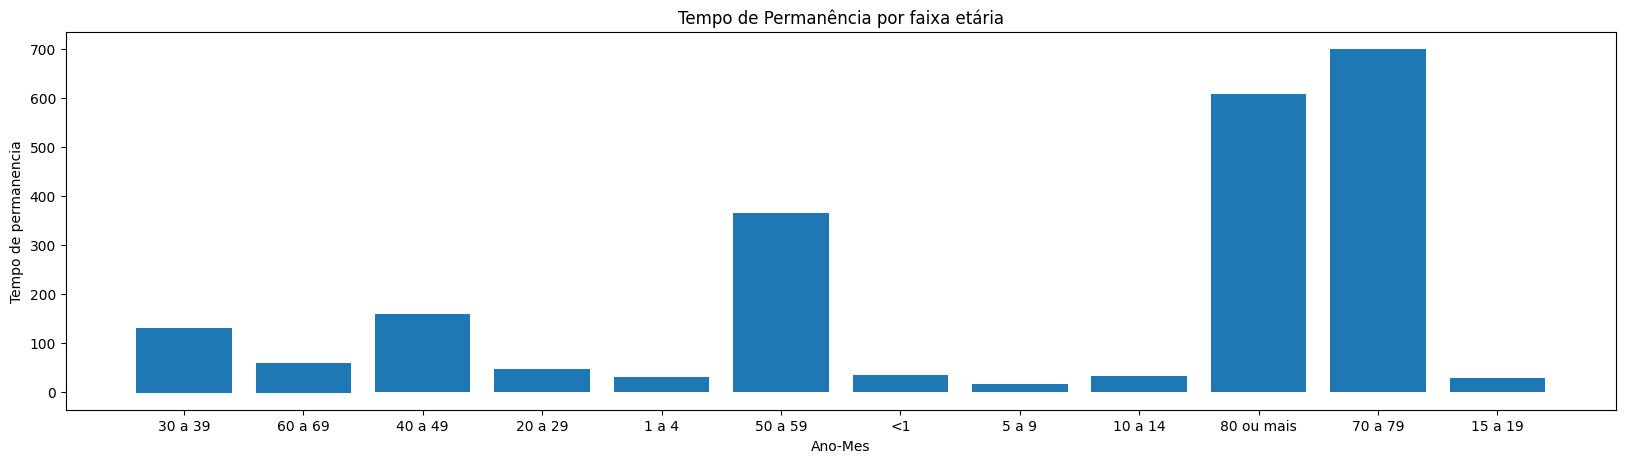

In [ ]:
plt.figure(figsize=(20, 5), dpi=100)
plt.bar(BR_CONS["FAIXA_ETARIA"], BR_CONS["TEMPO_DE_PERMANENCIA"])
plt.ylabel('Tempo de permanencia')
plt.xlabel('Ano-Mes')
plt.title('Tempo de Permanência por faixa etária')
plt.show()

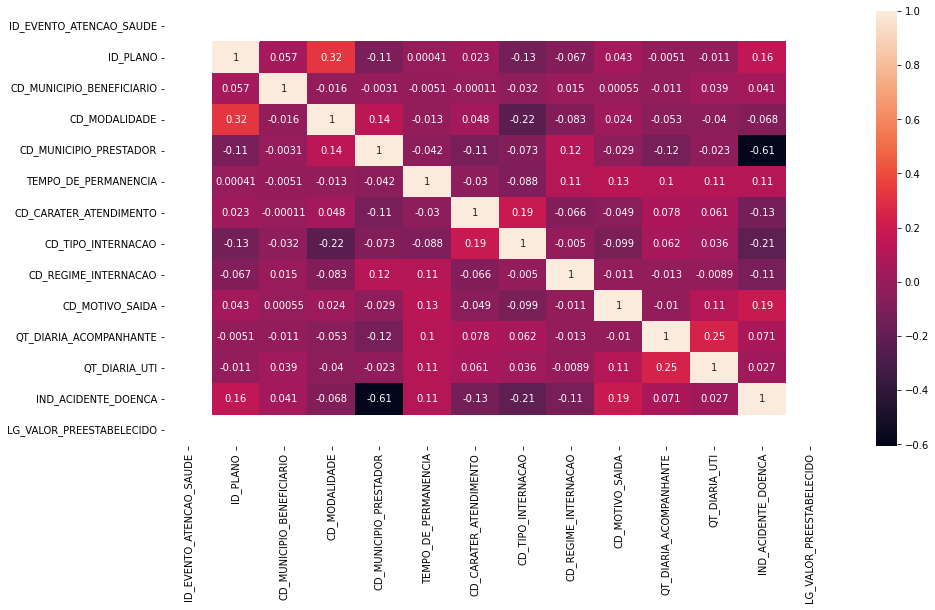

In [ ]:
plt.figure( figsize=(15,8) ) 
sns.heatmap(BR_CONS.corr(), annot=True)

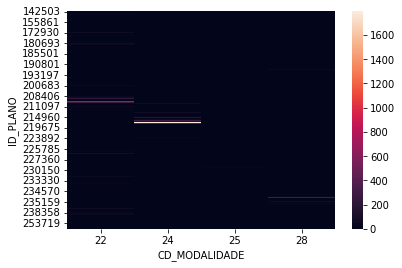

In [ ]:

plt.figure()
sns.heatmap(pd.crosstab(BR_CONS['ID_PLANO'],BR_CONS['CD_MODALIDADE']))
plt.show()

# 2 - Pré-processamento de dados

In [ ]:
x = BR_CONS[["IND_ACIDENTE_DOENCA", "TEMPO_DE_PERMANENCIA", "CD_TIPO_INTERNACAO", "CD_CARATER_ATENDIMENTO"]]
y = BR_CONS["CD_MUNICIPIO_PRESTADOR"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# 3 - Modelando Dados

In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 11358 elementos e testaremos com 3787 elementos
A acurácia foi 76.37%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

# print("A acurácia foi %.2f%%" % acuracia)
# #print("A f1 foi %.2f%%" % F1)
# print("A recall foi %.2f%%" % Recal)
# print("A Precisão foi %.2f%%" % Precisao)



Treinaremos com 11358 elementos e testaremos com 3787 elementos
A acurácia foi 78.85%


In [ ]:
# from sklearn.datasets import make_classification
# from sklearn.cross_validation import StratifiedShuffleSplit

# X, y = make_classification(n_samples=100, n_informative=10, n_classes=3)
# sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)

# for train_idx, test_idx in sss:
#     X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
#     svc.fit(X_train, y_train)
#     y_pred = svc.predict(X_test)
#     print(f1_score(y_test, y_pred, average="macro"))
#     print(precision_score(y_test, y_pred, average="macro"))
#     print(recall_score(y_test, y_pred, average="macro"))

In [ ]:
# from sklearn.tree import export_graphviz
# import graphviz

# features = x.columns
# dot_data = export_graphviz(modelo, out_file=None,
#                            filled = True, rounded = True,
#                            feature_names = features,
#                           class_names = ["não", "sim"])
# grafico = graphviz.Source(dot_data)
# grafico

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(raw_treino_x, treino_y);

In [ ]:
predictions = rf.predict(teste_x)

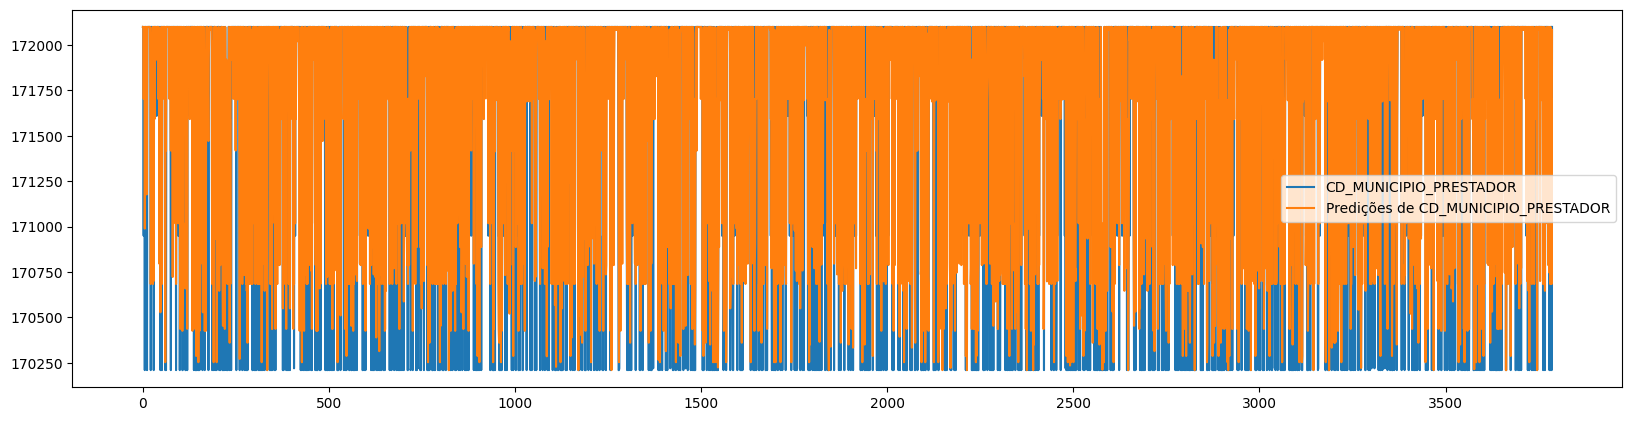

In [190]:
plt.figure(figsize=(20,5), dpi=100)
plt.plot(teste_y.to_numpy(),label="CD_MUNICIPIO_PRESTADOR")
plt.plot(predictions,label="Predições de CD_MUNICIPIO_PRESTADOR")
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(teste_y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(teste_y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(teste_y, predictions)))

Mean Absolute Error: 253.74930645595765
Mean Squared Error: 232422.78085499755
Root Mean Squared Error: 482.1024588767387


In [ ]:
rf.score(teste_x, teste_y)

0.6164459720325473